# Audiobooks Customer Return Prediction

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Modelling using Deep Neural Network 

## Problem Defition

This notebook is to practice the business case study explored in the *The Data Science Course 2023: Complete Data Science Bootcamp* on [Udemy](https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/). We'll use `pandas` to wrangle and `under_sampling` to balance the data instead of manual operations explained in the course.

You are given data from an audiobook app. Logically, it relates to the audio version of books only. Each customer in the database has made a purchase at least once. We want to create a machine learning algorithm based on our data that can predict if a customer will buy again from the audiobook company.

## Data

The sample dataset is taken from the *Section 51: Deep Learning - Business Case Example* of *The Data Science Course 2023: Complete Data Science Bootcamp* on [Udemy](https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/). The dataset has 12 columns features to be used predicting the label which is Target columns in the dataset. You can see the data dictionary [here](Data/README.md).

## Evaluation

> If we can reach more than 90% accuracy at predicting whether or not a customer is going to come back and purchase new audiobook, we'll pursue the project.

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
⚠️ Note: Due to the nature of experimentation, the evaluation metric may change over time.
</div>

## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [4]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import seaborn as sb
sb.set(style="ticks")

# Preprocessing the data
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# DNN Related Keras Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model



## Load Data

In [2]:
columns = ['ID', 'Book length (mins)_overall', 'Book length (mins)_avg', 
           'Price_overall', 'Price_avg', 'Review', 'Review 10/10', 
           'Minutes listened', 'Completion', 'Support Requests',
           'Last visited minus Purchase date', 'Targets']
df = pd.read_csv('Data/Audiobooks_data.csv', header=None)
df.columns = columns
df.shape

(14084, 12)

## Data Exploration (Exploratory Data Analysis - EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,ID,Book length (mins)_overall,Book length (mins)_avg,Price_overall,Price_avg,Review,Review 10/10,Minutes listened,Completion,Support Requests,Last visited minus Purchase date,Targets
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [4]:
df.tail()

,ID,Book length (mins)_overall,Book length (mins)_avg,Price_overall,Price_avg,Review,Review 10/10,Minutes listened,Completion,Support Requests,Last visited minus Purchase date,Targets
14079,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,988.2,0,4,0
14080,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,313.2,0,29,0
14081,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0
14082,32832,1620.0,1620,5.33,5.33,1,8.00,0.38,615.6,0,90,0
14083,251,1674.0,3348,5.33,10.67,0,8.91,0.00,0.0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                14084 non-null  int64  
 1   Book length (mins)_overall        14084 non-null  float64
 2   Book length (mins)_avg            14084 non-null  int64  
 3   Price_overall                     14084 non-null  float64
 4   Price_avg                         14084 non-null  float64
 5   Review                            14084 non-null  int64  
 6   Review 10/10                      14084 non-null  float64
 7   Minutes listened                  14084 non-null  float64
 8   Completion                        14084 non-null  float64
 9   Support Requests                  14084 non-null  int64  
 10  Last visited minus Purchase date  14084 non-null  int64  
 11  Targets                           14084 non-null  int64  
dtypes: f

✍🏼 No Null values

### Distribution of Targets

In [6]:
df['Targets'].value_counts()

0    11847
1     2237
Name: Targets, dtype: int64

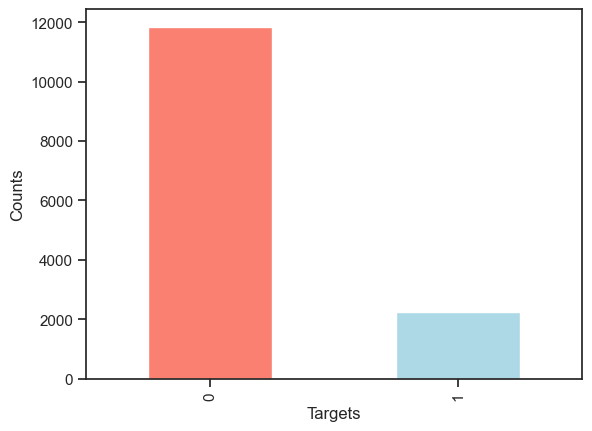

In [7]:
df['Targets'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('Targets')
plt.ylabel('Counts')
plt.show()

✍🏼 Needs balancing

### Distribution of Price_overall

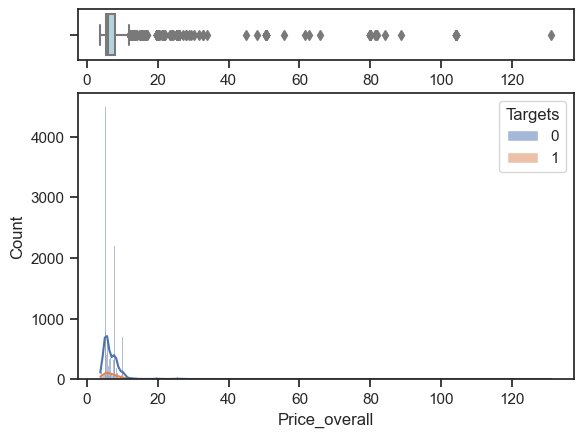

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={'height_ratios':(0.15, 0.85)})

sb.boxplot(data=df, x='Price_overall', color='lightblue', ax=ax_box)
sb.histplot(data=df, x='Price_overall', hue='Targets', kde=True, ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

### Distribution of Completion

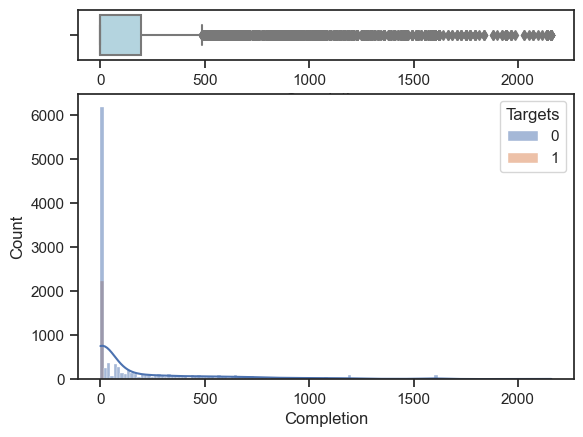

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={'height_ratios':(0.15, 0.85)})

sb.boxplot(data=df, x='Completion', color='lightblue', ax=ax_box)
sb.histplot(data=df, x='Completion', hue='Targets', kde=True, ax=ax_hist)
plt.show()

### Distribution of Review

<AxesSubplot: xlabel='Review', ylabel='count'>

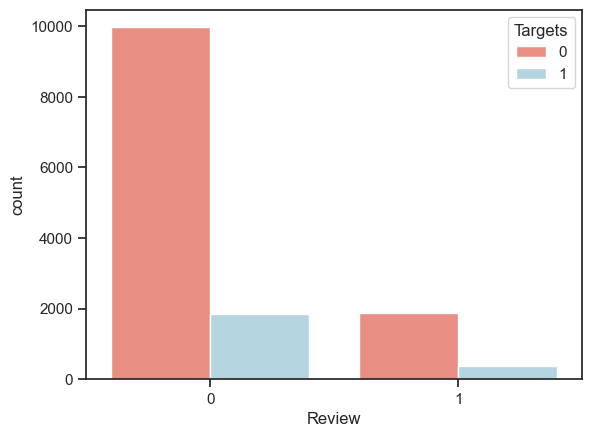

In [18]:
sb.countplot(data=df, x='Review', hue='Targets', palette=['salmon', 'lightblue'])

## Data Preprocessing

### Drop the columns that we'll not use

In [8]:
df.drop(['ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Book length (mins)_overall        14084 non-null  float64
 1   Book length (mins)_avg            14084 non-null  int64  
 2   Price_overall                     14084 non-null  float64
 3   Price_avg                         14084 non-null  float64
 4   Review                            14084 non-null  int64  
 5   Review 10/10                      14084 non-null  float64
 6   Minutes listened                  14084 non-null  float64
 7   Completion                        14084 non-null  float64
 8   Support Requests                  14084 non-null  int64  
 9   Last visited minus Purchase date  14084 non-null  int64  
 10  Targets                           14084 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.2 MB


### Determine the Features and Targets

In [9]:
x = df.drop('Targets', axis=1)
y = df['Targets']

### Balancing the Dataset

We'll use `RandomUnderSampler` from `imblearn` library. We'll set `random_state` parameter to `101` for reproducing purpose. Also, `sampling_strategy` will be set to `majority` which will undersample the majority class determined by the class with the largest number of examples.

0    2237
1    2237
Name: Targets, dtype: int64


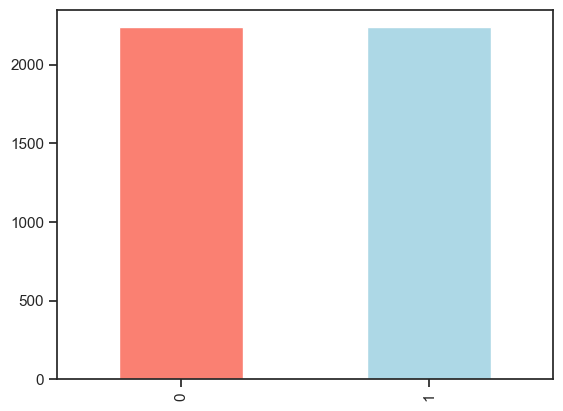

In [10]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=101)

x_under, y_under = undersample.fit_resample(x, y)

print(y_under.value_counts())

y_under.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.show()

### Splitting Data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.2, random_state=101)

## Modelling

In [17]:
def create_model():
    input_size = 10
    output_size = 2
    hidden_layer_size = 50
    
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_shape=(input_size, ), activation='relu'))
    model.add(Dense(hidden_layer_size, activation='relu'))
    model.add(Dense(output_size, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Below commands graphically summarize the deep neural model
    # Create a NetworkX graph
    G = nx.Graph()

    # Add nodes and display the number of nodes for each layer
    for i, layer in enumerate(model.layers):
        layer_name = layer.name
        num_nodes = layer.output_shape[-1]
        G.add_node(layer_name, num_nodes=num_nodes)
        print(f"Layer: {layer_name}, Number of Nodes: {num_nodes}")

    # Add edges
    for i in range(len(model.layers) - 1):
        G.add_edge(model.layers[i].name, model.layers[i+1].name)

    # Visualize the graph with node annotations
    pos = nx.spring_layout(G)  # Adjust the layout if needed
    nx.draw(G, pos, with_labels=False)
    node_labels = nx.get_node_attributes(G, 'num_nodes')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

    plt.show()
    
    return model

Layer: dense_24, Number of Nodes: 50
Layer: dense_25, Number of Nodes: 50
Layer: dense_26, Number of Nodes: 2


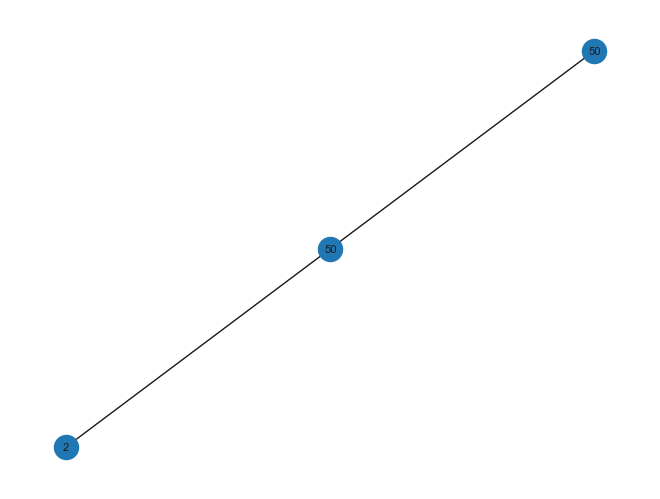

In [18]:
model = create_model()

In [60]:
model = create_model()
batch_size = 100
max_epochs = 100

early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train.values, y_train.values, verbose=2, validation_split=0.1, 
                    batch_size=batch_size, epochs=max_epochs, callbacks=[early_stop])

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/100
33/33 - 0s - loss: 109.8690 - accuracy: 0.5598 - val_loss: 15.0265 - val_accuracy: 0.5363 - 258ms/epoch - 8ms/step
Epoch 2/100
33/33 - 0s - loss: 3.9843 - accuracy: 0.7016 - val_loss: 1.0480 - val_accuracy: 0.7486 - 38ms/epoch - 1ms/step
Epoch 3/100
33/33 - 0s - loss: 0.7765 - accuracy: 0.7336 - val_loss: 0.8305 - val_accuracy: 0.6983 - 39ms/epoch - 1ms/step
Epoch 4/100
33/33 - 0s - loss: 0.6164 - accuracy: 0.7442 - val_loss: 0.5199 - val_accuracy: 0.7151 - 36ms/epoch - 1ms/step
Epoch 5/100
33/33 - 0s - loss: 0.4922 - accuracy: 0.7507 - val_loss: 0.4827 - val_accuracy: 0.7346 - 36ms/epoch - 1ms/step
Epoch 6/100
33/33 - 0s - loss: 0.4527 - accuracy: 0.7529 - val_loss: 1.0070 - val_accuracy: 0.7123 - 37ms/epoch - 1ms/step
Epoch 7/100
33/33 - 0s - loss: 1.2384 - accuracy: 0.7302 - val_loss: 1.0229 - val_accuracy: 0.74

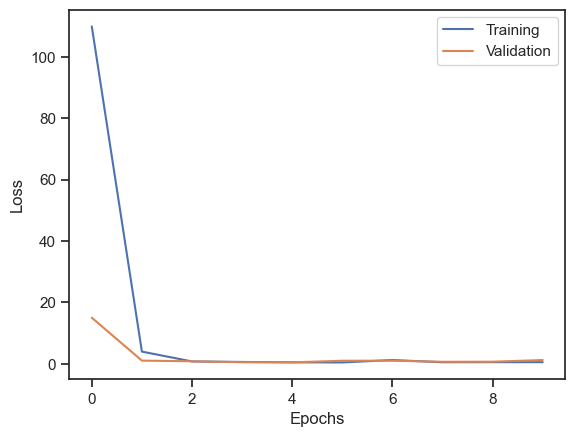

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Testing Model

In [63]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTest Loss: {0:.2f} and Test Accuracy: {1:.2f}%'.format(test_loss, test_acc*100))

28/28 [==============================] - 0s 717us/step - loss: 1.1176 - accuracy: 0.7419

Test Loss: 1.12 and Test Accuracy: 74.19%
